In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galaxy Shape Demo

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [3]:
from halotools.empirical_models import HodModelFactory

# define the central occupatoion model
from halotools.empirical_models import TrivialPhaseSpace, Zheng07Cens
cens_occ_model =  Zheng07Cens(threshold = -19)
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Zheng07Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
sats_occ_model =  Zheng07Sats(threshold = -19)
sats_prof_model = SubhaloPhaseSpace('satellites', np.logspace(10.5, 15.2, 15))

# define shape model
from shape_model_componenets import PS08Shapes
cens_shape_model = PS08Shapes(gal_type = 'centrals', sample='all', galaxy_type='elliptical')
sats_shape_model = PS08Shapes(gal_type = 'satellites', sample='all', galaxy_type='elliptical')

#define alignment model
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
central_orientation_model = RandomAlignment(gal_type='centrals')
satellite_orientation_model = RandomAlignment(gal_type='satellites')

#projected shapes
from shape_model_componenets import ProjectedShape
central_proj_shapes_model = ProjectedShape('centrals')
satellite_proj_shapes_model = ProjectedShape('satellites')

# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_galaxy_shape = cens_shape_model,
                                 satellites_galaxy_shape = sats_shape_model,
                                 centrals_orientation = central_orientation_model,
                                 satellites_orientation = satellite_orientation_model,
                                 centrals_proj_shapes = central_proj_shapes_model,
                                 satellites_proj_shapes = satellite_proj_shapes_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_galaxy_shape',
                                 'satellites_galaxy_shape',
                                 'centrals_orientation',
                                 'satellites_orientation',
                                 'centrals_proj_shapes',
                                 'satellites_proj_shapes')
                                )

In [4]:
# populate mock catalog
model_instance.populate_mock(halocat)
print("number of galaxies: ", len(model_instance.mock.galaxy_table))

number of galaxies:  189778


In [5]:
mock = model_instance.mock.galaxy_table

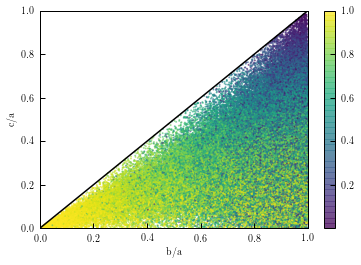

In [20]:
color = np.array(1-mock['galaxy_projected_b_to_a'])

plt.figure()
plt.scatter(mock['galaxy_b_to_a'], mock['galaxy_c_to_a'], alpha=0.5, s=1, c=color)
plt.plot([0,1],[0,1], '-', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('b/a')
plt.ylabel('c/a')
plt.colorbar()
plt.show()

In [21]:
epsilon = 1-mock['galaxy_b_to_a']
gamma_1 = mock['galaxy_c_to_a']
gamma_2 = mock['galaxy_c_to_a']/mock['galaxy_b_to_a']

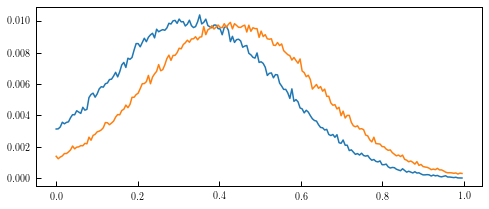

In [22]:
bins = np.linspace(0,1, 200)

counts_1 = np.histogram(gamma_1, bins)[0]
counts_1 = counts_1/np.sum(counts_1)

counts_2 = np.histogram(gamma_2, bins)[0]
counts_2 = counts_2/np.sum(counts_2)

plt.figure(figsize=(8, 3.3))
plt.plot(bins[:-1], counts_1)
plt.plot(bins[:-1], counts_2)
plt.show()

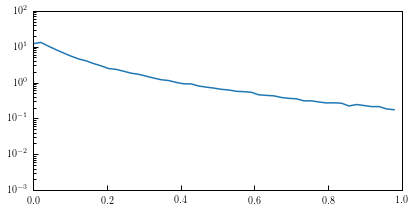

In [23]:
bins = np.linspace(0,1)

counts = np.histogram(epsilon, bins)[0]
counts = counts/np.sum(counts)*100

plt.figure(figsize=(6.6, 3.3))
plt.plot(bins[:-1], counts)
plt.yscale('log')
plt.ylim([0.001,100])
plt.xlim([0,1])
plt.show()

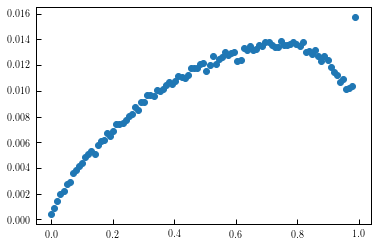

In [24]:
e = np.array(1-mock['galaxy_projected_b_to_a'])

bins = np.linspace(0,1, 100)

counts = np.histogram(e, bins)[0]
counts = counts/np.sum(counts)

plt.figure()
plt.plot(bins[:-1], counts, 'o')
plt.show()

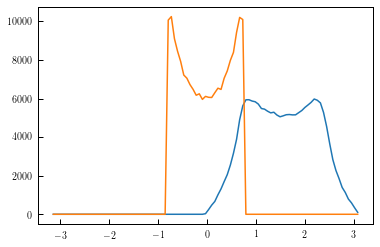

In [21]:
bins = np.linspace(-np.pi,np.pi,100)
counts_1 = np.histogram(mock['galaxy_theta'], bins=bins)[0]

x = np.random.random(len(mock))*2-1
counts_2 = np.histogram(np.arctan(x), bins=bins)[0]

plt.plot(bins[:-1], counts_1)
plt.plot(bins[:-1], counts_2)
plt.show()

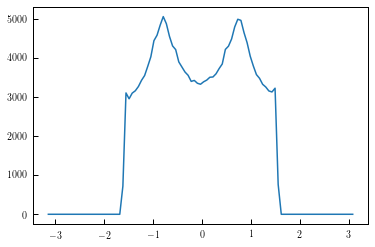

In [7]:
bins = np.linspace(-np.pi,np.pi,100)
counts = np.histogram(mock['galaxy_phi'], bins=bins)[0]

plt.plot(bins[:-1], counts)
plt.show()

In [35]:
v1 = np.vstack((mock['galaxy_axisC_x'], mock['galaxy_axisC_y'], mock['galaxy_axisC_z'])).T
v2 = np.vstack((mock['galaxy_axisB_x'], mock['galaxy_axisB_y'], mock['galaxy_axisB_z'])).T
v3 = np.vstack((mock['galaxy_axisA_x'], mock['galaxy_axisA_y'], mock['galaxy_axisA_z'])).T

In [42]:
from rotations.vector_utilities import elementwise_dot

np.min(elementwise_dot(v2,v1)), np.max(elementwise_dot(v2,v3))

(-8.940697e-08, 8.940697e-08)